1. Escriba un programa para solucionar estas ecuaciones utilizando el método Runge-Kutta de
orden 4 con paso fijo. Elija adecuadamente el sistema de unidades y escriba correspondien-
temente los valores de M y G. Como condición inicial, suponga que en t = 0 el cometa se
encuentra en las coordenadas
(
x = 4 × 109 km
(3)
y = 0 km
y se mueve con la velocidad
(
vx =
vy =
0 m/s
500 m/s.
(4)
Implemente una función que calcule las cantidades conservadas del problema (energía y mo-
mento angular) para cada paso temporal. Escoja un tamaño de paso ∆t apropiado para poder
calcular al menos 5 orbitas completas del cometa. Grafique la trayectoria y compruebe que du-
rante las 5 orbitas se mantiene igual. Grafique el comportamiento de las cantidades conservadas
en función del tiempo y verifique su valor durante toda la trayectoria obtenida.

In [1]:
import numpy as np

def pasoRk4(f, t, y, h):
    k1 = f(t,y)
    k2=f(t+0.5*h,y+0.5*k1*h)
    k3=f(t+0.5*h,y+0.5*k2*h)
    k4 =f(t+h,y+k3*h)
    return y+h/6.0*(k1+2*k2+2*k3+k4)

def rk4(f,ti,ps,tf,n):
    h = (ti-tf)/n
    ts = np.linspace(ti,tf,n)
    for i in range(n-1):
        ps[i+1]=pasoRk4(f,ts[i],ps[i],h)
    return ps

In [2]:
def funcion(t,p):
    G = 4*np.power(np.pi,2) #constante gravitacional con años, ua y masas solares
    M = 1 #masas solares
    r = p[:2]
    a = -(G*M)*r/np.linalg.norm(r) ** 3
    s = [p[2],p[3],a[0],a[1]]

    return np.array(s)

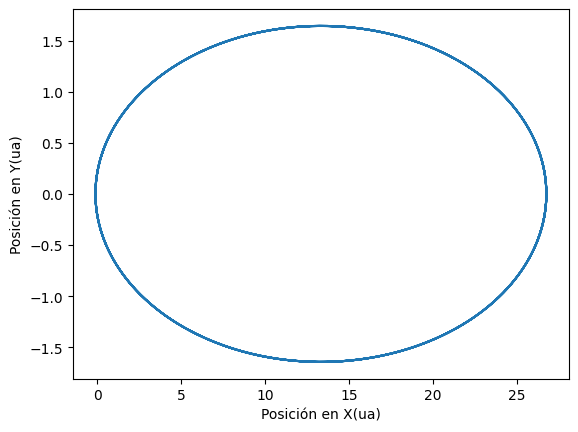

In [3]:
import matplotlib.pyplot as plt

x0 = 26.73834848907 #ua
y0 = 0 #ua

vx0 = 0 #ua/año
vy0 = 0.105403 #ua/año

p0 = np.array([x0,y0,vx0,vy0])

ti = 0
tf = 250
n = 1000000

p = np.zeros((n,4))
p[0] = p0

estados = rk4(funcion,ti,p,tf,n)

estados = estados.T

plt.plot(estados[0],estados[1])
plt.xlabel('Posición en X(ua)')
plt.ylabel('Posición en Y(ua)')
plt.show()

In [29]:
def energiaCinetica(m,vx,vy):
    v = np.linalg.norm([vx,vy])
    return (m*np.power(v,2))/2

def energiaPotencial(G,M,m,x,y):
    r = np.linalg.norm([x,y])
    return -G*M*m/r

def energiaTotal(m,vx,vy,x,y):

    G = 4*np.power(np.pi,2) #constante gravitacional con años, ua y masas solares
    M = 1 #masas solares
    
    ec = energiaCinetica(m,vx,vy)
    ep = energiaPotencial(G,M,m,x,y)

    return ec + ep

In [5]:
def momentoAngular(m,vx,vy,x,y):

    r = np.linalg.norm([x,y])
    vp = vx*y - vy*x

    L = m*r*vp

    return L

In [6]:
m = 1.1061279482e-16 #cometa halley en masas solares

energias = [energiaTotal(m,vx,vy,x,y) for x,y,vx,vy in estados.T]
momentos = [momentoAngular(m,vx,vy,x,y) for x,y,vx,vy in estados.T]

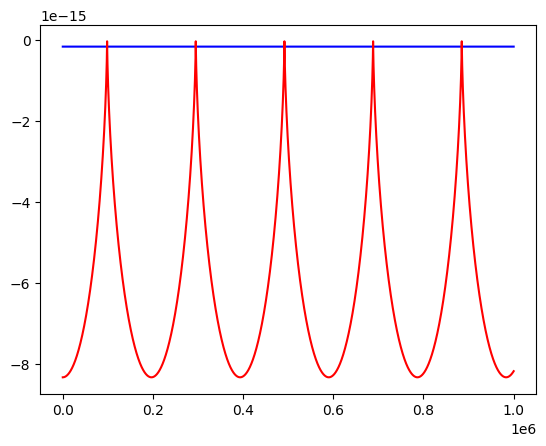

In [7]:
plt.plot(energias, c="blue")
plt.plot(momentos, c="red")
plt.show()

In [8]:
def rk4Adaptativo(f,ts,ps,tf,epsilon):
    ti = ts[0]
    h = (tf-ti)*epsilon
    i = 0
    t = ti
    p = ps[0]
    while t < tf:

        if t + h > tf:
            h = tf - t
        
        p_new = pasoRk4(f, t, p, h)
        p_half = pasoRk4(f, t, p, h/2)
        
        error = np.linalg.norm(p_new - p_half, 2)

        if error < epsilon:
            t += h 
            ts.append(t)           
            p = p_new
            ps.append(p)
            i+=1

        h = 0.8 * h * (epsilon / error) ** 0.2
        #if i%1000 == 0:
        #    print("t",t,"i",i,"h",h)
    print("completado luego de",i,"pasos")
    return ps

In [9]:
x0 = 26.73834848907 #ua
y0 = 0 #ua

vx0 = 0 #ua/año
vy0 = 0.105403 #ua/año

p0 = np.array([x0,y0,vx0,vy0])

ts = [0]
tf = 250
epsilon = 1/2.5

p = [p0]

estadosA = rk4Adaptativo(funcion,ts,p,tf,epsilon)
estadosA = np.asarray(estadosA)

completado luego de 2380 pasos


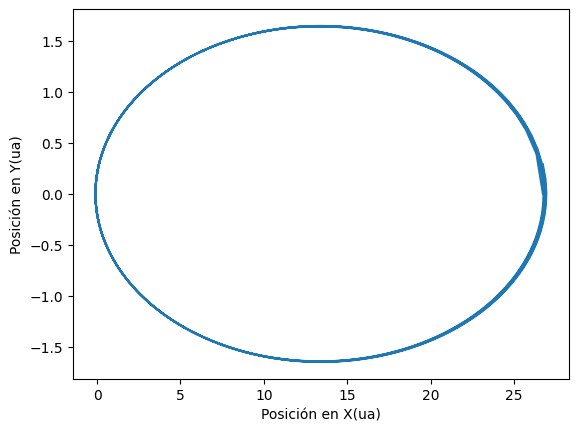

In [10]:
estadosA = estadosA.T

plt.plot(estadosA[0],estadosA[1])
plt.xlabel('Posición en X(ua)')
plt.ylabel('Posición en Y(ua)')
plt.show()

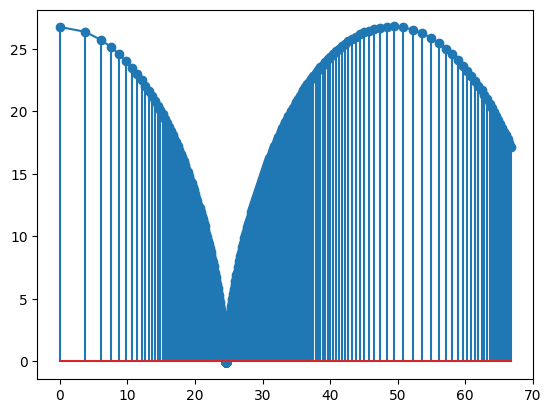

In [11]:
plt.plot(ts[0:500],estadosA[0][0:500])
plt.stem(ts[0:500],estadosA[0][0:500])
plt.show()

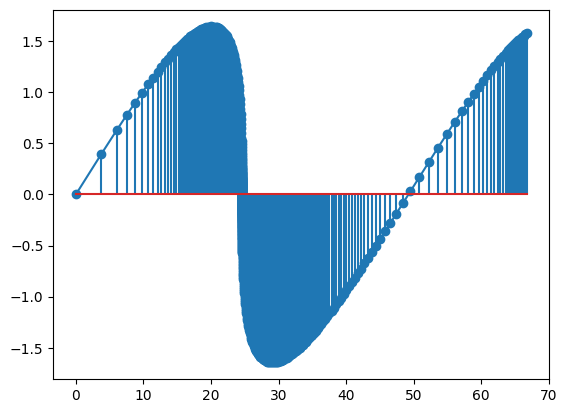

In [12]:
plt.plot(ts[0:500],estadosA[1][0:500])
plt.stem(ts[0:500],estadosA[1][0:500])
plt.show()

B. Orbita Terrestre

In [12]:
import numpy as np

def funcion2(x):
    G = 4*np.power(np.pi,2) #constante gravitacional con años, ua y masas solares
    M = 1 #masas solares
    r = x
    a = -(G*M)*r/np.linalg.norm(r) ** 3

    return np.array(a)

In [24]:
def pasoVVerlet(x_s,v_s,a_s,dt):    
    x_s.append(x_s[-1] + v_s[-1] * dt + 0.5 * a_s[-1] * np.power(dt,2))
    a_s.append(funcion2(x_s[-1]))
    v_s.append(v_s[-1] + 0.5 * (a_s[-2] + a_s[-1]) * dt)

def vVerlet(x_s,v_s,a_s,ti,tf,dt):
    n = (tf-ti)/dt
    n = int(n)
    for i in range(n-1):
        pasoVVerlet(x_s,v_s,a_s,dt)

In [25]:
x_s = [np.asarray([1,0])]
v_s = [np.asarray([0,3.0287e4 * (31557600) / (1.496e11)])]
a_s = [funcion2(x_s[-1])]

dt = 1 / (365.25 * 24)

vVerlet(x_s,v_s,a_s,0,5,dt)

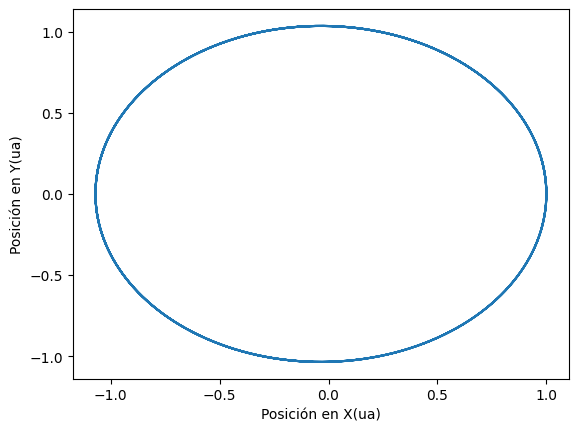

In [28]:
x_s = np.asarray(x_s)
v_s = np.asarray(v_s)

x_s = x_s.T

import matplotlib.pyplot as plt

plt.plot(x_s[0],x_s[1])
plt.xlabel('Posición en X(ua)')
plt.ylabel('Posición en Y(ua)')
plt.show()

In [38]:
m = 3.00273e-6 #masa de la tierra en masas solares
G = 4*np.power(np.pi,2) #constante gravitacional con años, ua y masas solares
M = 1 #masas solares

energiasCineticas = [energiaCinetica(m,vx,vy) for vx,vy in v_s]
energiasPotenciales = [energiaPotencial(G,M,m,x,y) for x,y in x_s.T]
energias = []

for i in range(len(energiasCineticas)):
    x,y = x_s.T[i]
    vx,vy = v_s[i]
    energias.append(energiaTotal(m,vx,vy,x,y))

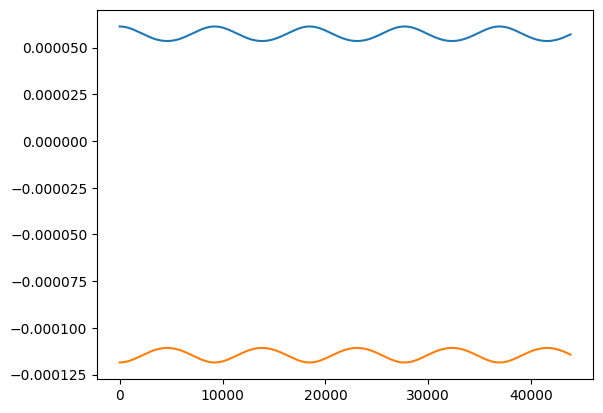

In [31]:
plt.plot(energiasCineticas)
plt.plot(energiasPotenciales)
plt.show()

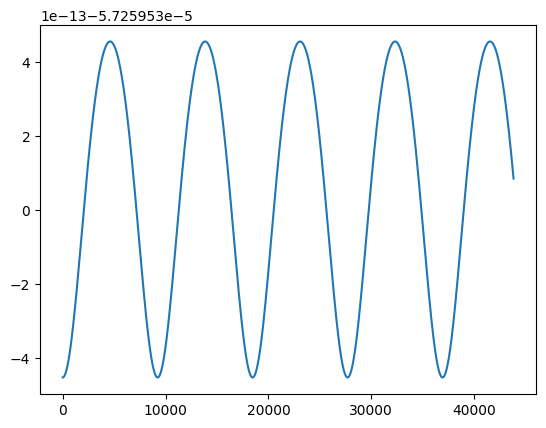

In [39]:
plt.plot(energias)
plt.show()

In [45]:
x_s = [np.asarray([29.65817614408064,0])]
v_s = [np.asarray([0,6.1218e3 * (31557600) / (1.496e11)])]
a_s = [funcion2(x_s[-1])]

dt = 250 / (365.25 * 24)

vVerlet(x_s,v_s,a_s,0,2500,dt)

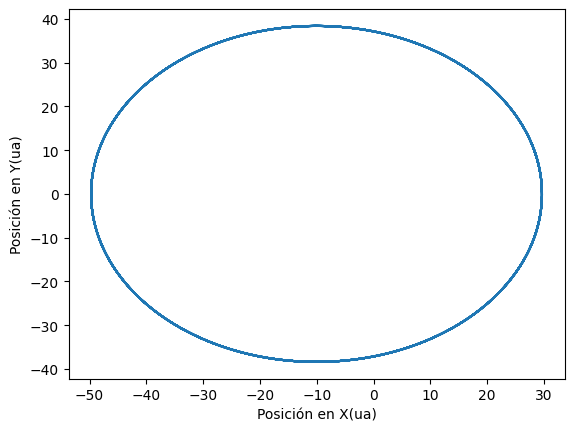

In [46]:
x_s = np.asarray(x_s)
v_s = np.asarray(v_s)

x_s = x_s.T

import matplotlib.pyplot as plt

plt.plot(x_s[0],x_s[1])
plt.xlabel('Posición en X(ua)')
plt.ylabel('Posición en Y(ua)')
plt.show()